In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats

In [116]:
dataset=pd.read_csv(r"C:\Users\Satish\Downloads\Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [117]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [119]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [120]:
X=dataset.iloc[:,0:1].values
y=dataset.iloc[:,1].values

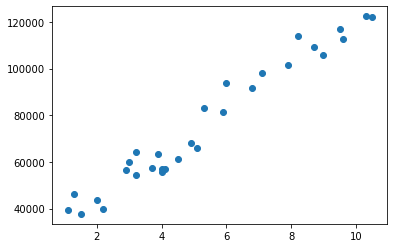

In [121]:
plt.scatter(X,y)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) 

  

In [123]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
y_pred=model.predict(X_test)

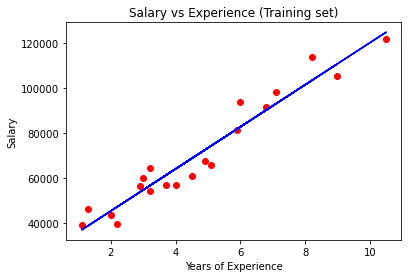

In [125]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

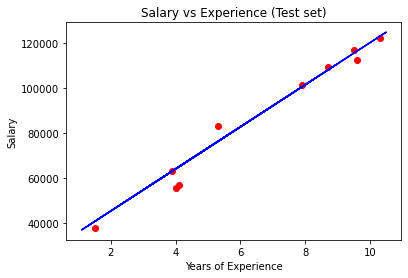

In [126]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [127]:
 model.predict([[15]])

array([167005.32889087])

In [128]:
import statsmodels.formula.api as smf
model=smf.ols("X~y",data=dataset).fit()
model

In [129]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [130]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [131]:
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [132]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [133]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        20:14:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
def dignostic_plots(dataset,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    dataset[variable].hist()
    plt.subplot(1,2,2)
    stats.probplot(dataset[variable],dist='norm',plot=plt)
    plt.show()

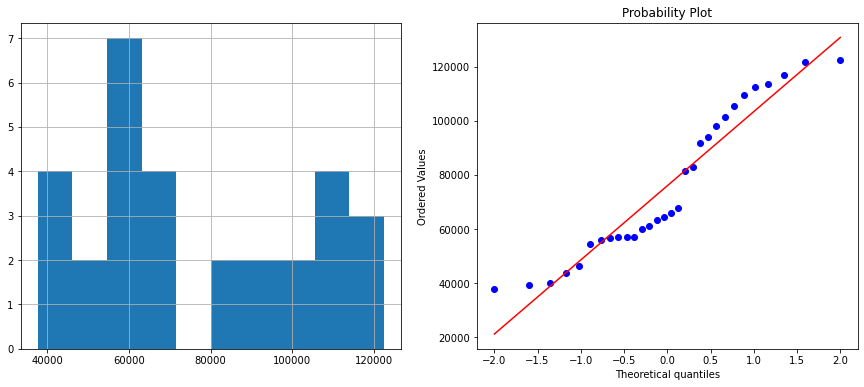

In [135]:
dignostic_plots(dataset,'Salary')

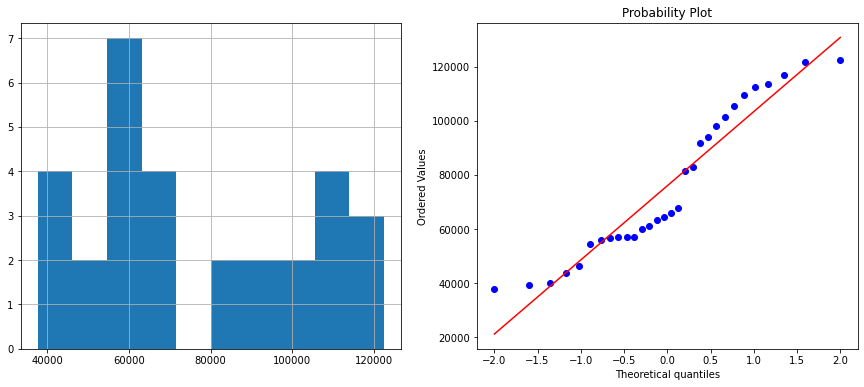

In [136]:
dignostic_plots(dataset,'Salary')

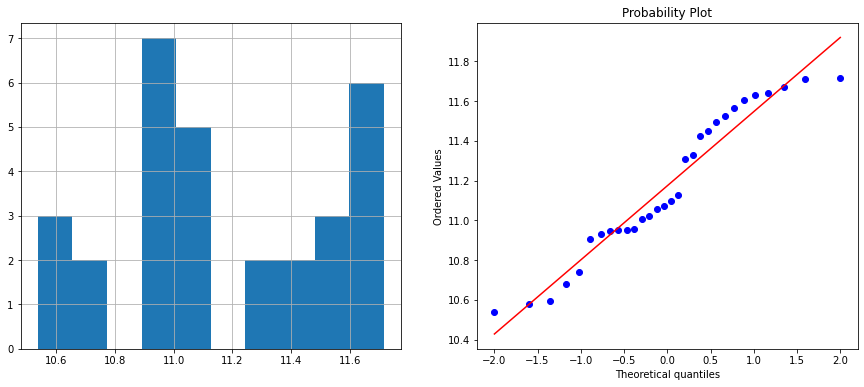

In [137]:
dataset['Salary']=np.log(dataset['Salary']+1)
dignostic_plots(dataset,'Salary')

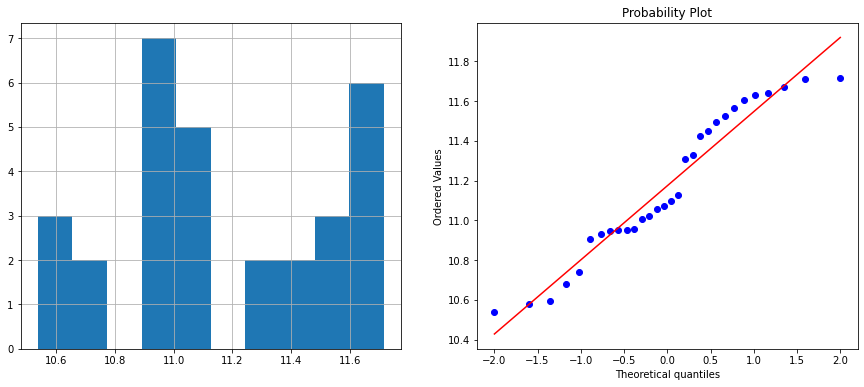

In [138]:
dataset['log_Salary']=np.log(dataset['Salary']+1)
dignostic_plots(dataset,'Salary')

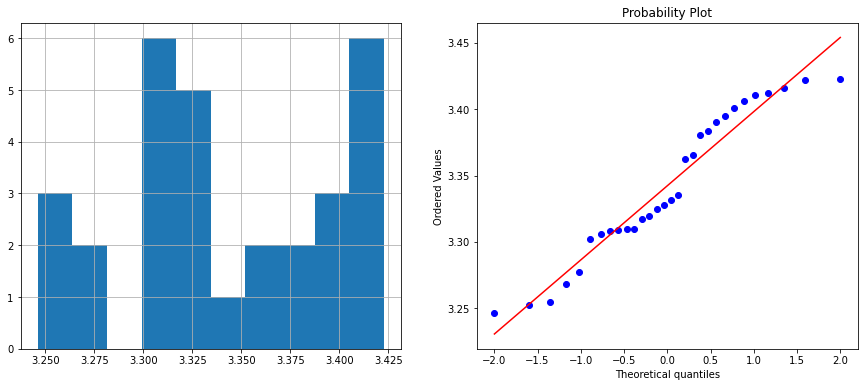

In [139]:
dataset['sqr_Salary']=dataset['Salary']**(1/2)
dignostic_plots(dataset,'sqr_Salary')

In [21]:
#Delivery_time -> Predict delivery time using sorting time

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [121]:
dataset=pd.read_csv(r"C:\Users\Satish\Downloads\delivery_time.csv")

In [122]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [124]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [125]:
data=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [126]:
from scipy.stats import skew
print(skew(data.delivery_time))

0.326702631656106


C:\Users\Satish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time'>

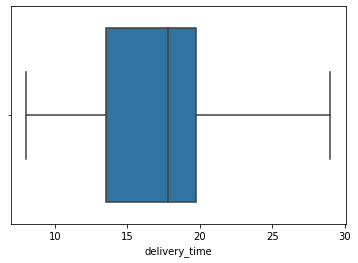

In [127]:
sns.boxplot(data['delivery_time'], orient = 'h')

C:\Users\Satish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

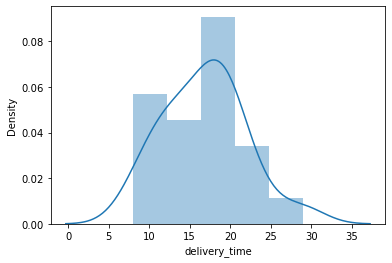

In [128]:
sns.distplot(data['delivery_time'])

In [129]:
print(skew(data.sorting_time))

0.043680994983108075


C:\Users\Satish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sorting_time'>

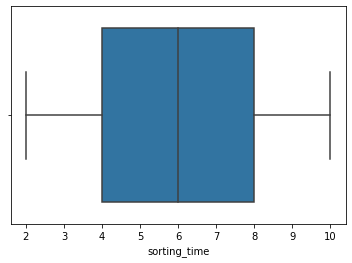

In [130]:
sns.boxplot(data['sorting_time'], orient='h')

C:\Users\Satish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

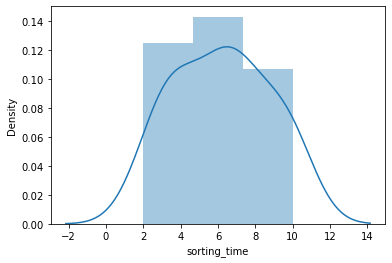

In [131]:
sns.distplot(data['sorting_time'])

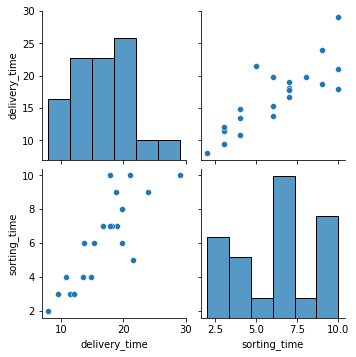

In [132]:
sns.pairplot(data)

In [133]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:>

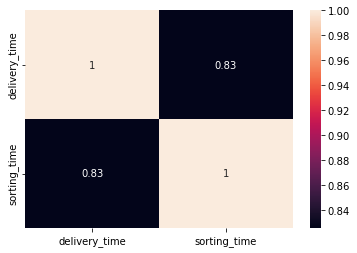

In [134]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

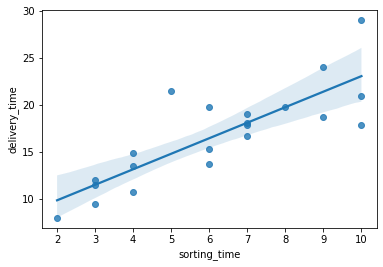

In [135]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [136]:
model1=smf.ols("delivery_time~sorting_time",data=data).fit()

In [137]:
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [138]:
model1.tvalues , model1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [139]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        15:51:43   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
model1.rsquared , model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [141]:
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [142]:
new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [143]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [144]:
model1.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64